In [1]:
from differences import ATTgt
from matplotlib import pyplot as plt
from analysis_utilities import aggregate_by_time_and_plot, aggregate_by_event_time_and_plot, \
    select_controls, test_balance, add_missing_indicators, prepare_df, generate_variable_names

plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300
import pandas as pd

# Store paths.
INPUT_DATA = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/data/03_cleaned/crime_analysis.csv"
OUTPUT_FIGURES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crime_200m/figures"
OUTPUT_TABLES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crime_200m/tables"


# Read restricted sample panel dataset into memory.
df = pd.read_csv(INPUT_DATA)

analysis='group_1_crimes_50m'

In [2]:
import numpy as np

value_vars_crime, month_to_int_dictionary, int_to_month_dictionary = generate_variable_names(analysis=analysis)

# Uncomment below line for "any crime" analysis
# df[value_vars_crime] = np.where(df[value_vars_crime] > 0, 1, 0)

In [3]:
covariates_exploration_df = select_controls(df=df, analysis=analysis, output_directory=OUTPUT_TABLES)
covariates_exploration_df

Dependent Variable  \
                                                                                            Assault-Related Crime Incidents Within 50m, Oct. 2022   
                                                 \emph{Independent Variable}                                                                        
Panel A: Pre-treatment Outcomes                  twenty_seventeen_group_1_crimes_50m                                              5.322663e-27      
                                                 pre_treatment_change_in_group_1_crimes_50m                                       3.117800e-07      
Panel B: Census Tract Characteristics            frac_coll_plus2010                                                               1.265790e-02      
                                                 job_density_2013                                                                 6.206815e-05      
                                                 med_hhinc2016                                                                    3.878483e-02      
                                                 poor_share2010                                                                   9.809544e-01      
                                                 popdensity2010                                                                   1.480912e-02      
                                                 rent_twobed2015                                                                  4.156727e-05      
                                                 share_white2010                                                                  8.764332e-01      
                                                 traveltime15_2010                                                                3.853440e-03      
Panel C: Case Initiation                         for_cause                                                                        6.510512e-01      
                                                 no_cause                                                                         3.341590e-01      
                                                 non_payment                                                                      2.804064e-01      
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                                                         1.151752e-01      
                                                 hasAttyP                                                                         1.798769e-01      
                                                 isEntityD                                                                        8.038002e-01      
                                                 isEntityP                                                                        2.523797e-03      

                                                                                                               
                                                                                            Plaintiff Victory  
                                                 \emph{Independent Variable}                                   
Panel A: Pre-treatment Outcomes                  twenty_seventeen_group_1_crimes_50m             5.252982e-01  
                                                 pre_treatment_change_in_group_1_crimes_50m      6.021780e-02  
Panel B: Census Tract Characteristics            frac_coll_plus2010                              2.403331e-01  
                                                 job_density_2013                                1.626836e-01  
                                                 med_hhinc2016                                   1.910501e-01  
                                                 poor_share2010                                  1.428679e-01  
                                                 popdensity2010                                  5.946111e-02  
                          

In [4]:
balance_table, pre_treatment_covariates = test_balance(df, analysis, covariates_exploration_df, OUTPUT_TABLES)
balance_table

\
                                                   Cases Won by Plaintiff   
Panel A twenty_seventeen_group_1_crimes_50m                      0.107030   
        pre_treatment_change_in_group_1_crimes_50m               0.007345   
Panel B frac_coll_plus2010                                       0.322882   
        job_density_2013                                     16069.137185   
        med_hhinc2016                                        48035.651626   
        popdensity2010                                       23086.043553   
        rent_twobed2015                                       1339.985876   
        traveltime15_2010                                        0.162315   
Panel D isEntityP                                                0.808499   

                                                   Difference in Cases Won by Defendant  \
                                                                             Unweighted   
Panel A twenty_seventeen_group_1_crimes_50m                                    0.012370   
        pre_treatment_change_in_group_1_crimes_50m                            -0.053334   
Panel B frac_coll_plus2010                                                     0.014179   
        job_density_2013                                                    3197.929971   
        med_hhinc2016                                                       1777.651626   
        popdensity2010                                                      1373.148087   
        rent_twobed2015                                                      -29.551242   
        traveltime15_2010                                                      0.005986   
Panel D isEntityP                                                              0.099762   

                                                                            \
                                                    \emph{p}      Weighted   
Panel A twenty_seventeen_group_1_crimes_50m         0.525298      0.008560   
        pre_treatment_change_in_group_1_crimes_50m  0.060218     -0.042497   
Panel B frac_coll_plus2010                          0.240333      0.073213   
        job_density_2013                            0.162684  12370.403716   
        med_hhinc2016                               0.191050   3309.981820   
        popdensity2010                              0.059461    547.579418   
        rent_twobed2015                             0.500304    180.560536   
        traveltime15_2010                           0.227158      0.022812   
Panel D isEntityP                                   0.000006      0.231867   

                                                                  
                                                        \emph{p}  
Panel A twenty_seventeen_group_1_crimes_50m         8.072941e-01  
        pre_treatment_change_in_group_1_crimes_50m  4.174066e-01  
Panel B frac_coll_plus2010                          8.789644e-04  
        job_density_2013                            4.345389e-03  
        med_hhinc2016                               1.987763e-01  
        popdensity2010                              6.980544e-01  
        rent_twobed2015                             2.490420e-02  
        traveltime15_2010                           1.821451e-02  
Panel D isEntityP                                   6.849002e-09

In [5]:
# Store treatment date variable -- may be either file_date or latest_docket_date -- and drop rows where missing.
treatment_date_variable = 'file_date'
treatment_month_variable = treatment_date_variable.replace('date', 'month')

# Generate indicators for missing data.
add_missing_indicators(df, ['rent_twobed2015'], pre_treatment_covariates)

# Prepare df for use with the differences package.
df = prepare_df(df, analysis, treatment_date_variable, pre_treatment_covariates, value_vars_crime, month_to_int_dictionary)

In [6]:
# Run DiD without conditioning on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
result = att_gt.fit(formula=analysis, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]  100%|████████████████████| 2184/2184 [00:13<00:00, 167.02it/s]


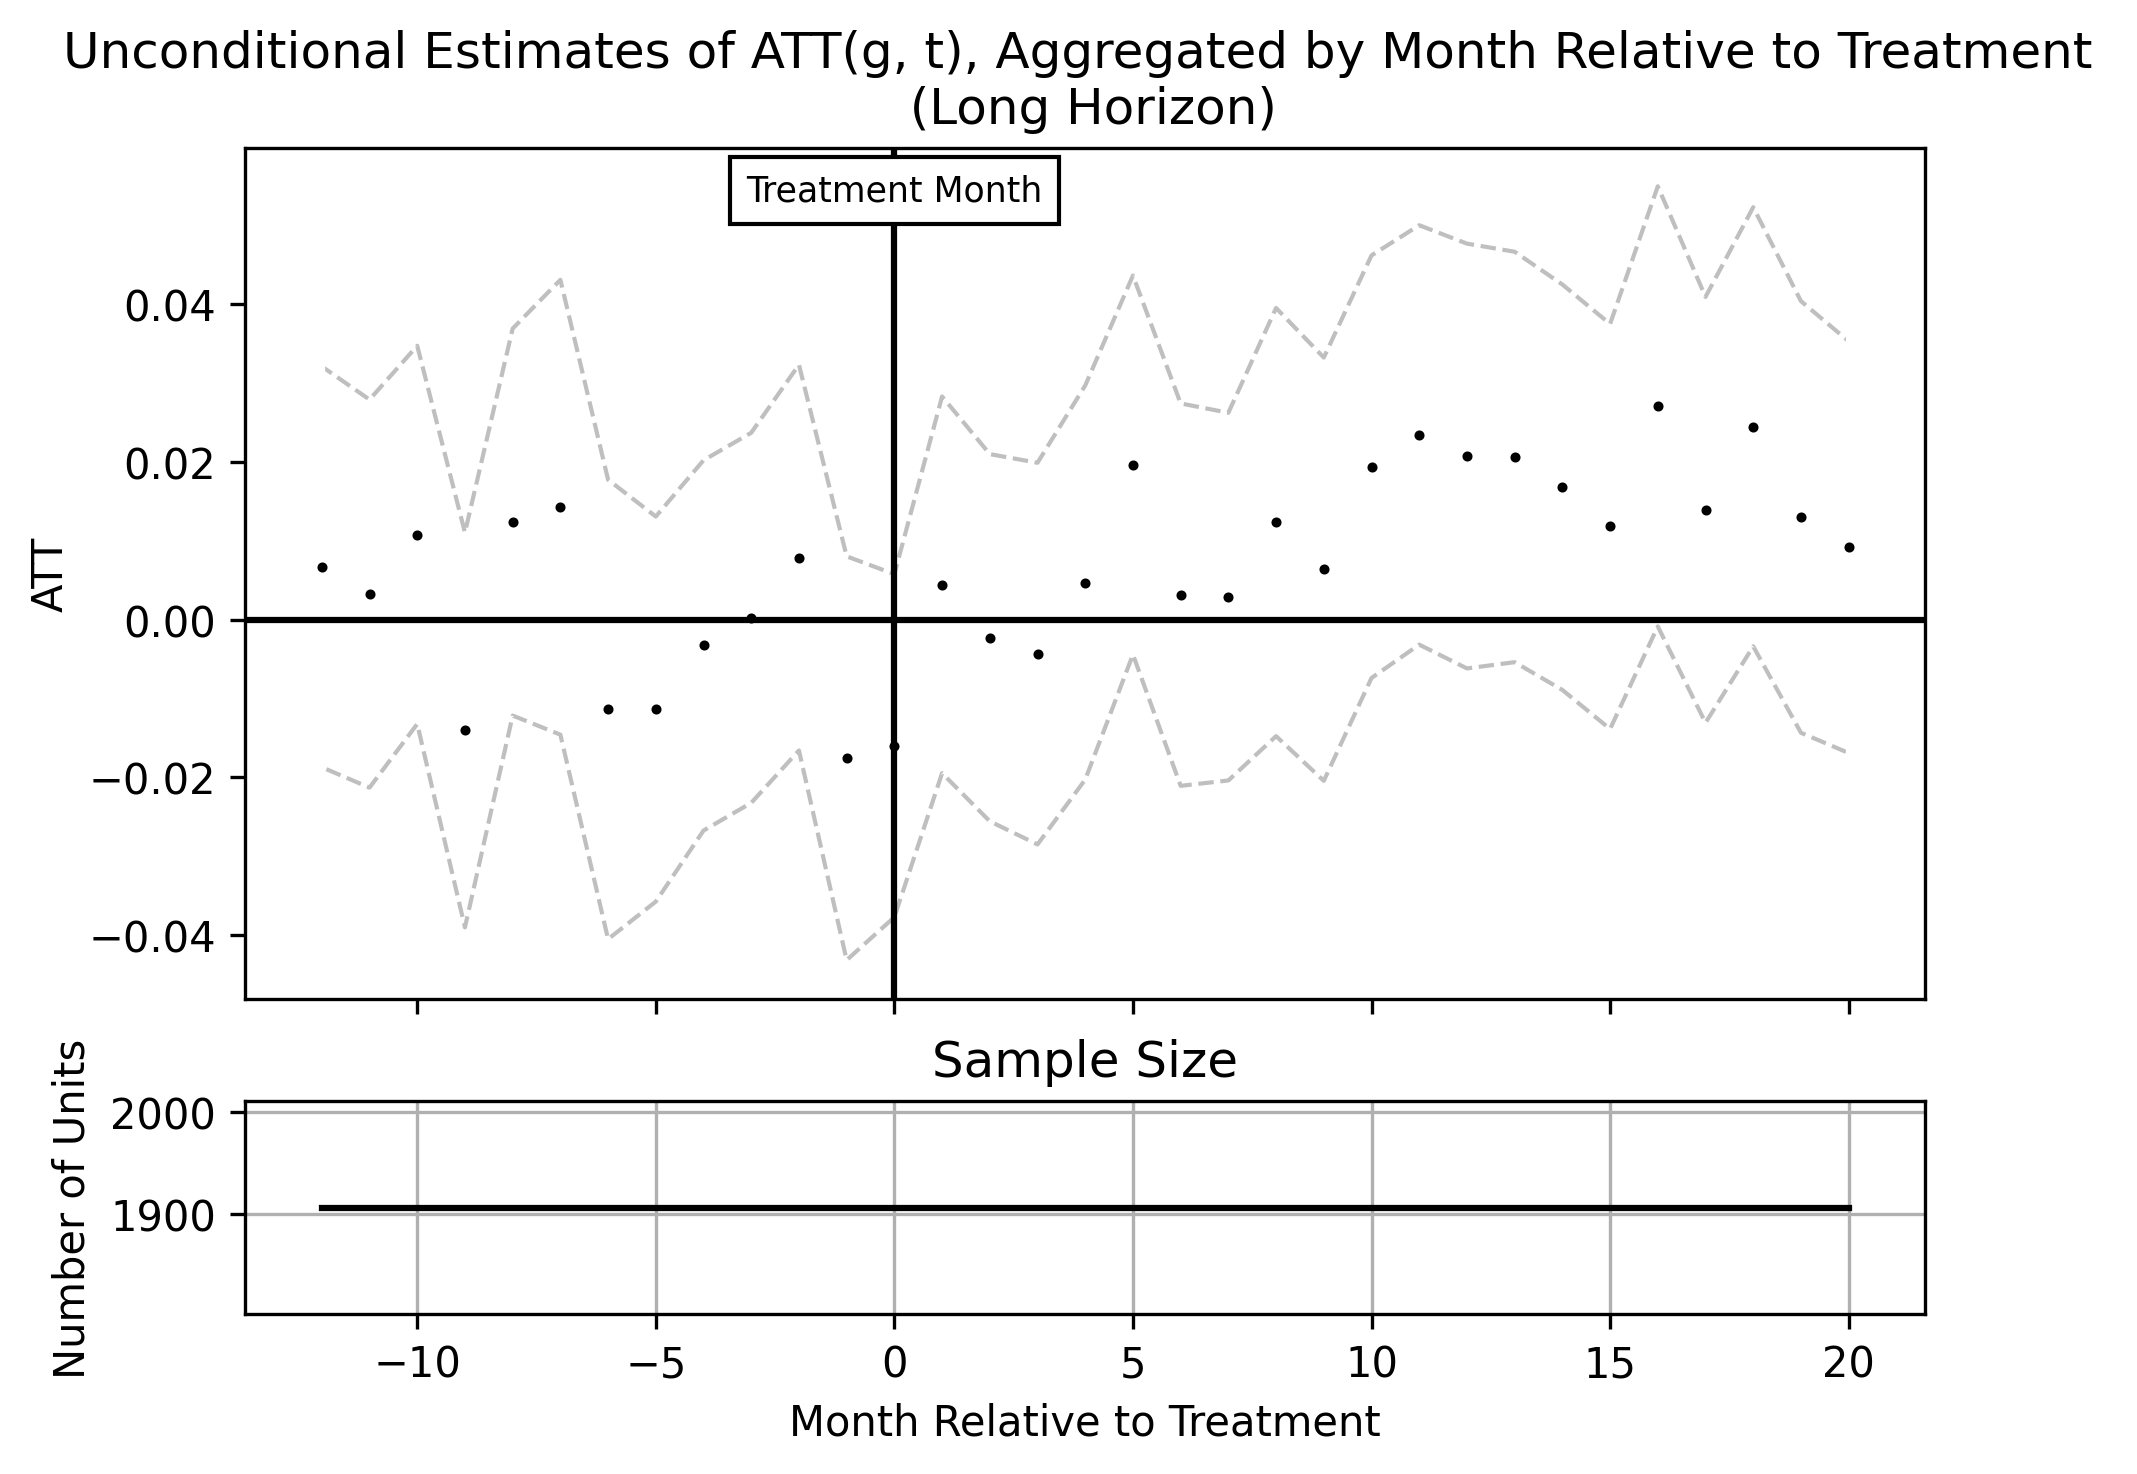

In [7]:
# Plot unconditional ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_unconditional_event_study_long_horizon.png",
                                 start_period=-12, end_period=20,
                                 title="Unconditional Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

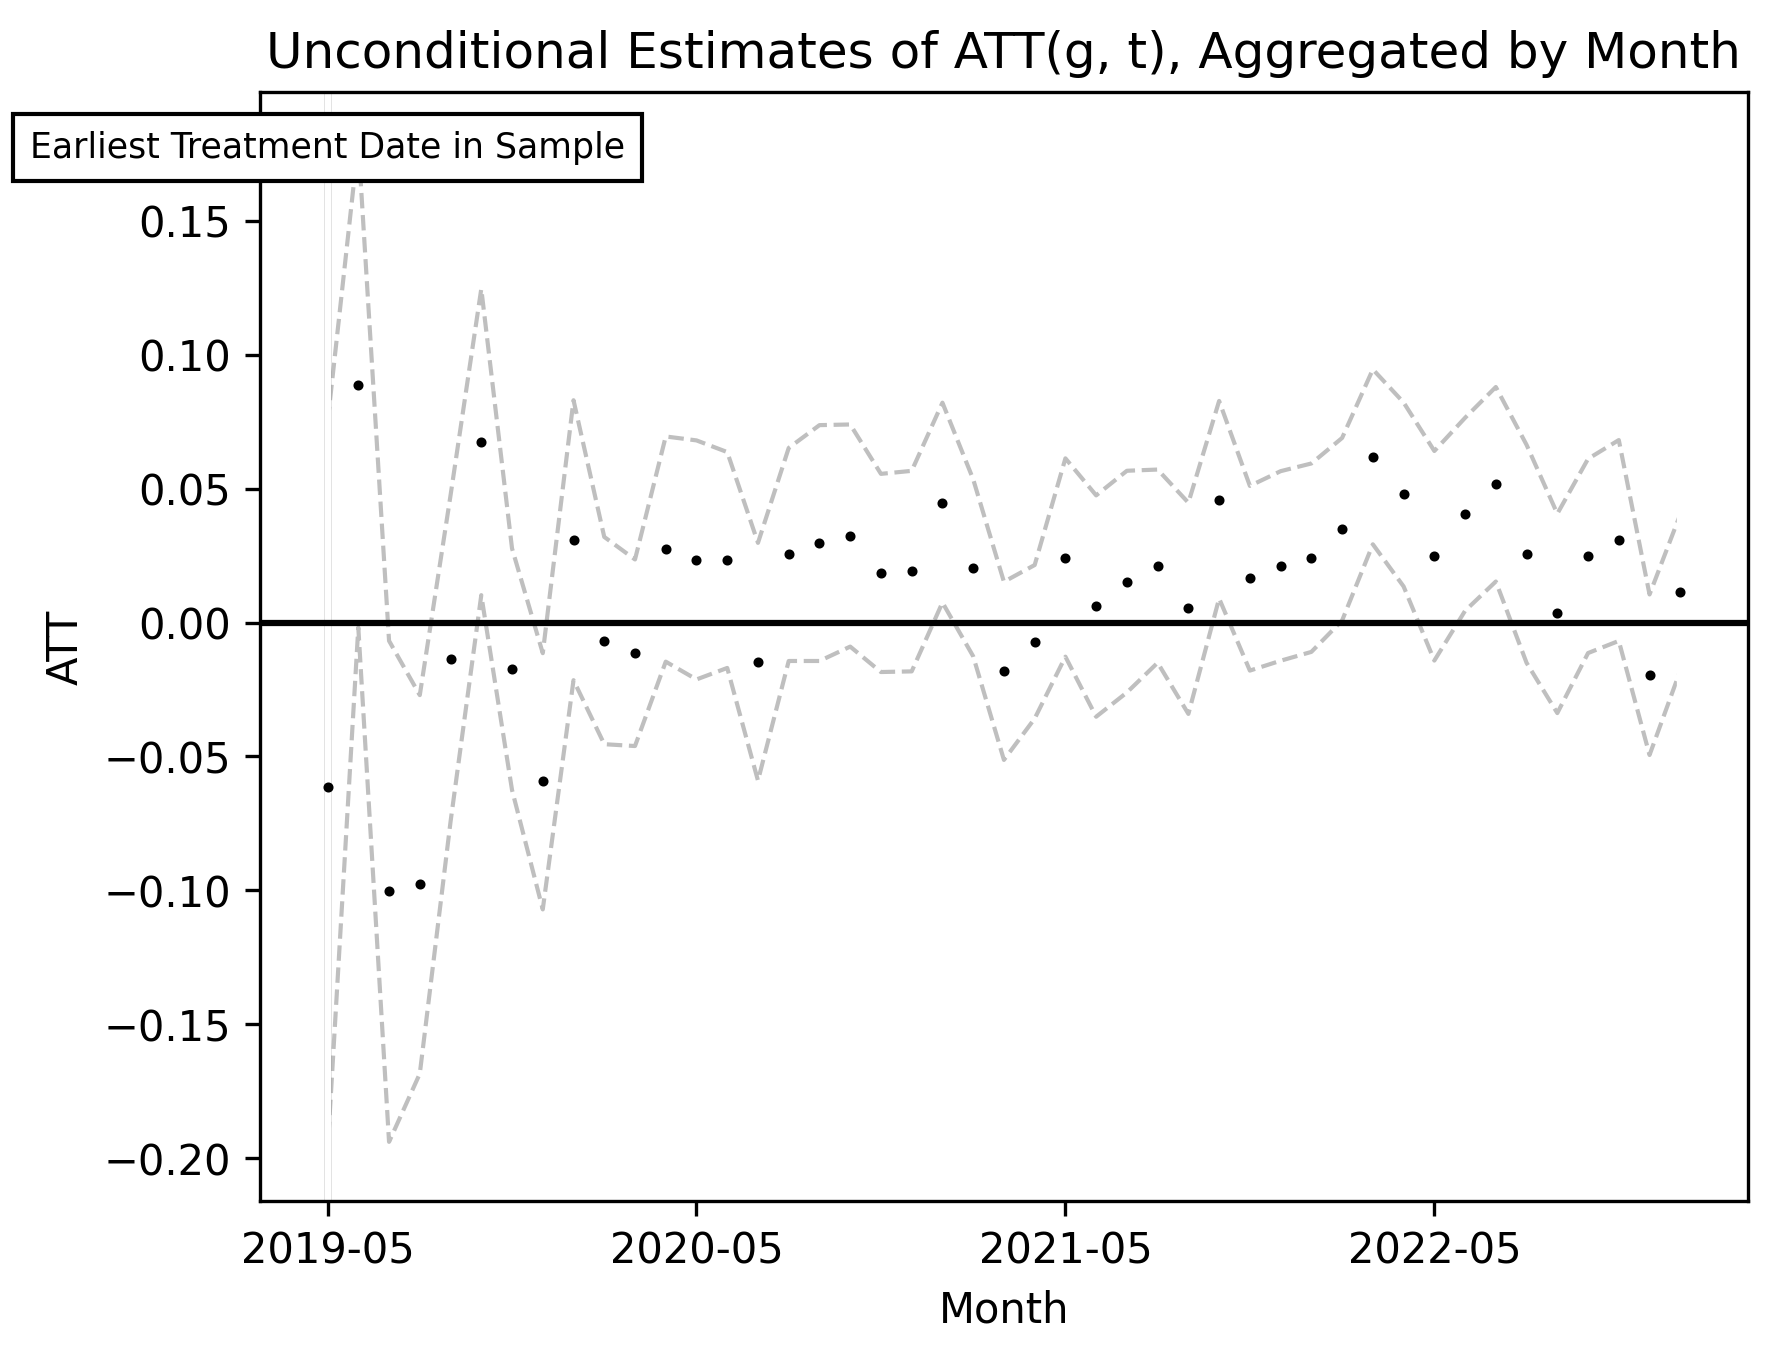

In [8]:
# Plot unconditional ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_unconditional_time.png",
                           title="Unconditional Estimates of ATT(g, t), Aggregated by Month")

In [ ]:
# Run DiD conditional on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
formula = f'{analysis} ~ ' + '+'.join(pre_treatment_covariates)
result = att_gt.fit(formula=formula, control_group='never_treated', n_jobs=-1)

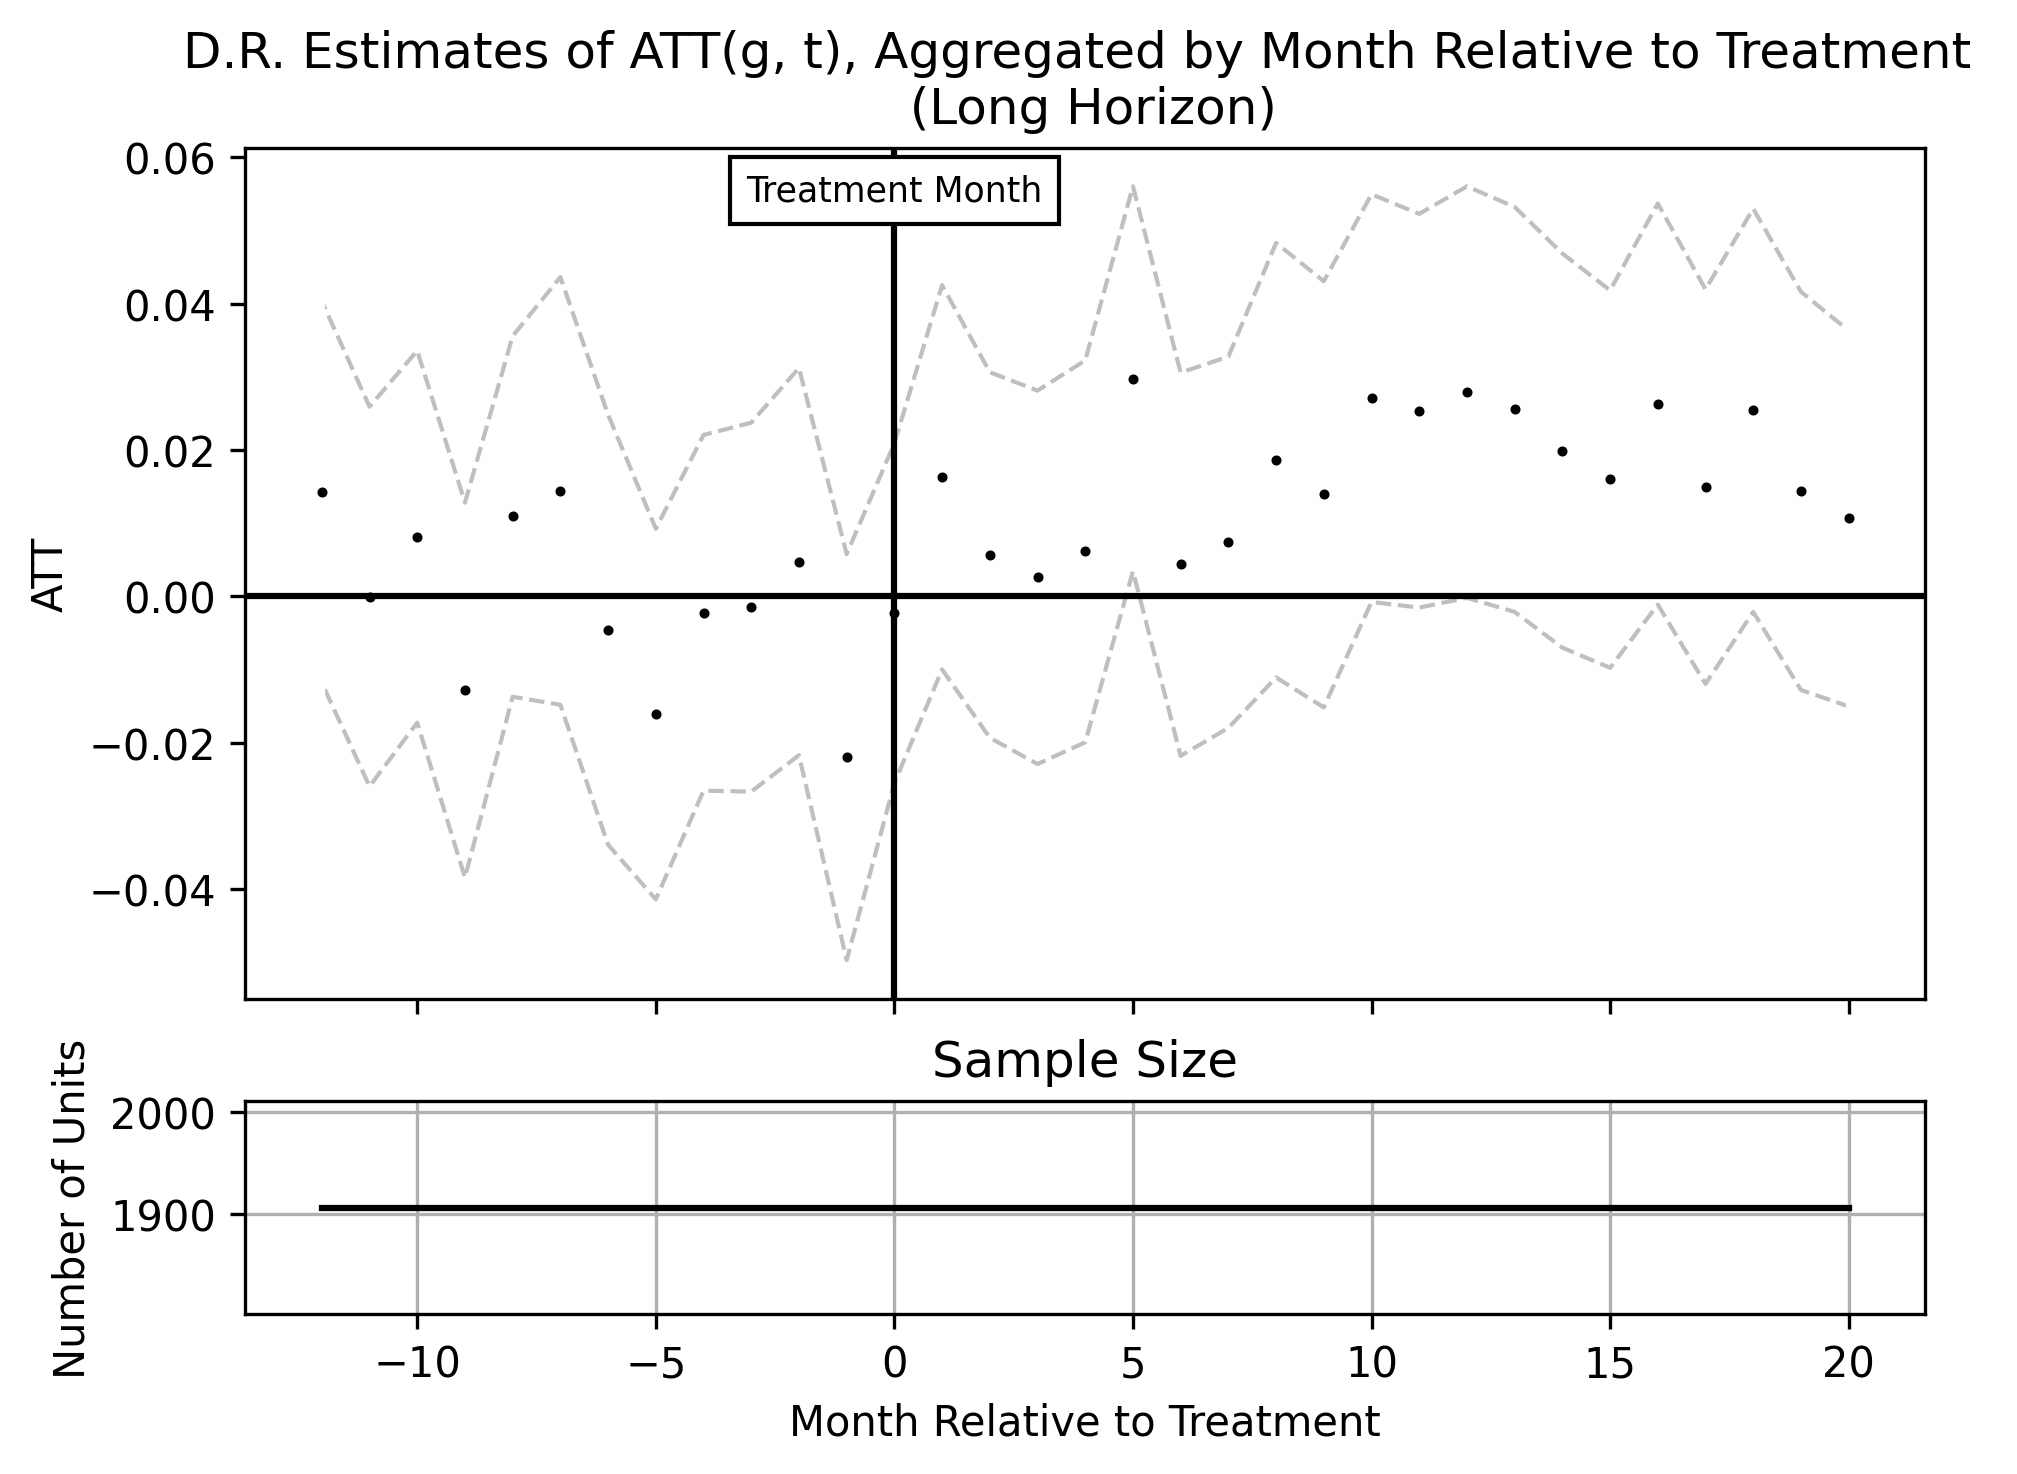

In [10]:
# Plot D.R. ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_dr_event_study_long_horizon.png", start_period=-12,
                                 end_period=20,
                                 title="D.R. Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

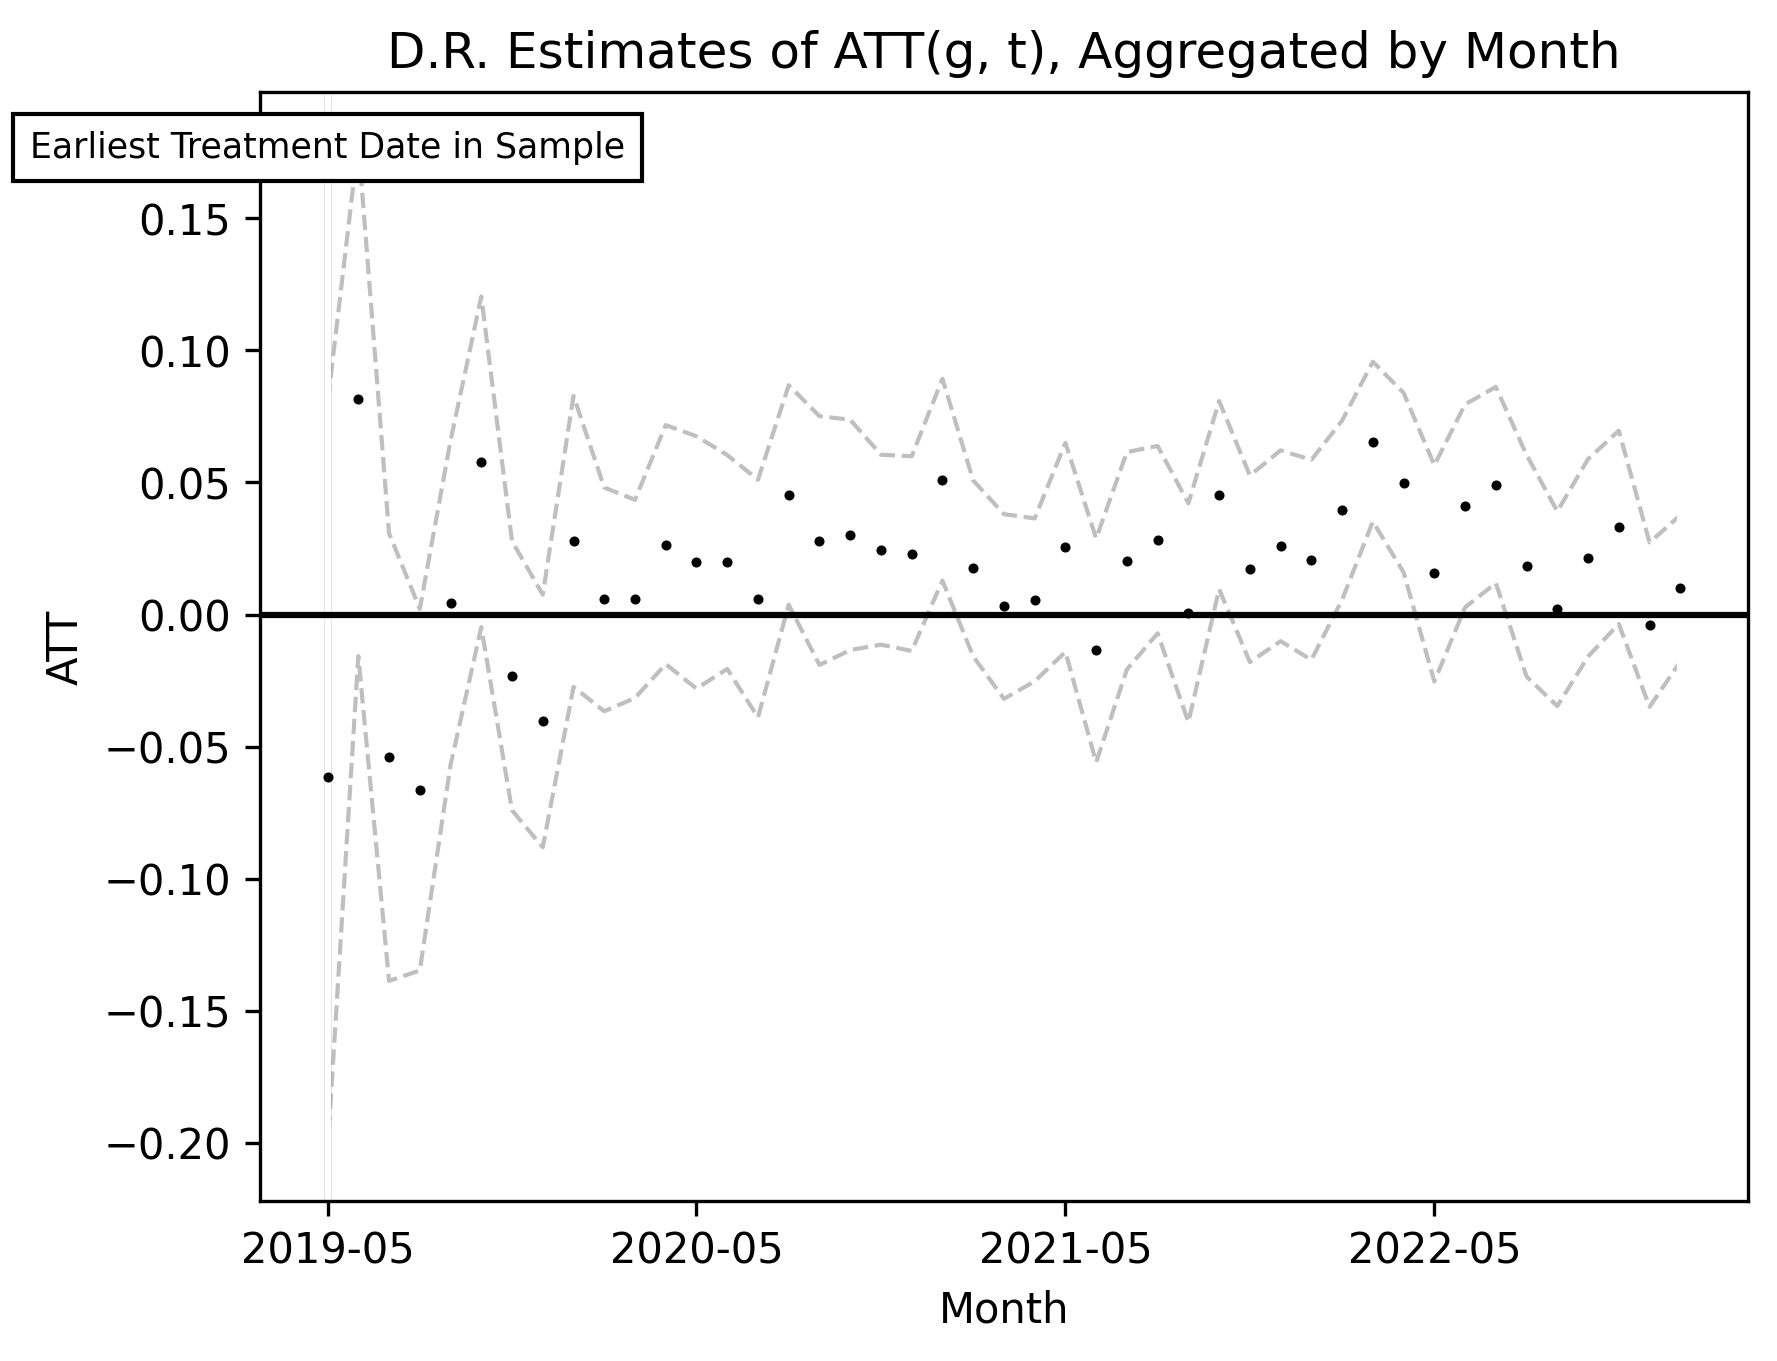

In [11]:
# Plot D.R. ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_dr_time.png",
                           title="D.R. Estimates of ATT(g, t), Aggregated by Month")